In [1]:
TITANIC_PATH ="./datasets/titanic/"


import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

%matplotlib inline

In [7]:
def load_data(path,filename):
    csv_path = os.path.join(path,filename)
    return pd.read_csv(csv_path)

In [8]:
train_data = load_data(TITANIC_PATH,"train.csv")
test_data = load_data(TITANIC_PATH,"test.csv")

In [9]:
train_data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [10]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


# feature annalysis

- passengerId : seems irrelevant
- survived : output variable (y) 1 for +ve
- Pclass : seems an important feature since people cabins can be at different positions as per the pclass
    - 1 = upper class
    - 2 = middle class
    - 3 = lower class
- Name : seems to be irrelevant (might be useful for post annalysis though )
- Sex : categorical feature might be useful 
    - m = male
    - f = female
- Age : seems important
- SibSp: # of siblings / spouse where 
    - Sibling = brother, sister, stepbrother, stepsister
    - Spouse = husband, wife (mistresses and fiancés were ignored)
- Parch : # of parents / children aboard the Titanic (Some children travelled only with a nanny, therefore parch=0 for them.)
    - Parent = mother, father
    - Child = daughter, son, stepdaughter, stepson
- Ticket : alpha_numeric seems irrelevant
- Fare : numeric (can be a good measure of income class) seems to be in dollars maybe ?
- Cabin : most of the entries are missing(are NaN ) alpha_numeric should represent proximity 
- Embarked : C = Cherbourg, Q = Queenstown, S = Southampton


In [16]:
print("survived vs not \n", train_data["Survived"].value_counts())
print("class of People \n", train_data["Pclass"].value_counts())
print("sex \n", train_data["Sex"].value_counts())
print("number of siblings or spouse \n", train_data["SibSp"].value_counts())
print("nu of Parents or childrens \n", train_data["Parch"].value_counts())
print("Embarked \n", train_data["Embarked"].value_counts())
# print("Fare \n", train_data["Fare"].value_counts())

survived vs not 
 0    549
1    342
Name: Survived, dtype: int64
class of People 
 3    491
1    216
2    184
Name: Pclass, dtype: int64
sex 
 male      577
female    314
Name: Sex, dtype: int64
number of siblings or spouse 
 0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64
nu of Parents or childrens 
 0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64
Embarked 
 S    644
C    168
Q     77
Name: Embarked, dtype: int64


In [14]:
train_data["y"]=np.linspace(0,100,)

train_data.describe()

# only mean age makes sense

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


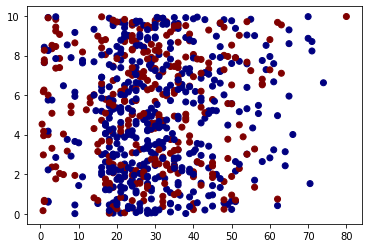

In [49]:
plt.scatter( train_data["Age"], y=np.random.rand(len(train_data["Age"]))*10,c=train_data["Survived"],cmap="jet")
# plt.legend()

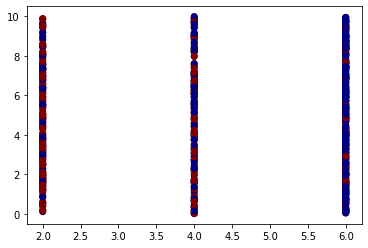

In [51]:
plt.scatter( train_data["Pclass"]*np.random.choice([1,2,3,4]), y=np.random.rand(len(train_data["Age"]))*10,c=train_data["Survived"],cmap="jet")

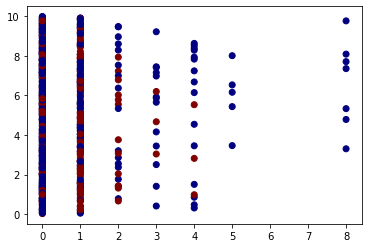

In [52]:
plt.scatter( train_data["SibSp"], y=np.random.rand(len(train_data["Age"]))*10,c=train_data["Survived"],cmap="jet")

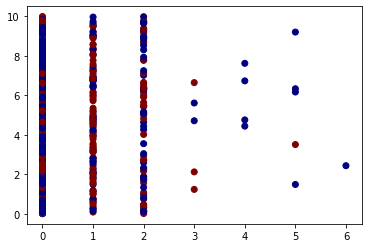

In [53]:
plt.scatter( train_data["Parch"], y=np.random.rand(len(train_data["Age"]))*10,c=train_data["Survived"],cmap="jet")

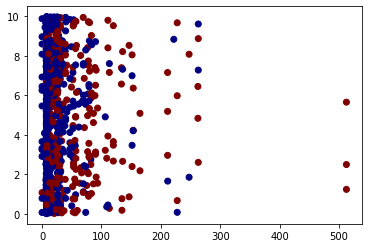

In [54]:
plt.scatter( train_data["Fare"], y=np.random.rand(len(train_data["Age"]))*10,c=train_data["Survived"],cmap="jet")

In [55]:
corr_matrix = train_data.corr()
corr_matrix

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb692bf5630>,
      dtype=object)

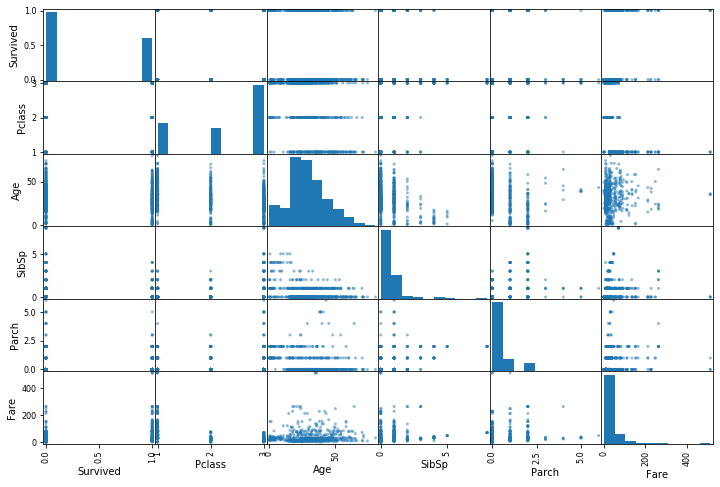

In [59]:
attributes = ["Survived","Pclass","Age","SibSp","Parch","Fare"]
scatter_matrix(train_data[attributes], figsize=(12,8))

In [62]:
train_data_cat1 = train_data[["Sex"]]
train_data_cat2 = train_data[["Embarked"]]

In [78]:
train = train_data.drop(["PassengerId","Name","Ticket","Cabin"],axis=1)
train = train.dropna(axis=0)
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [88]:
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [99]:
train_data = load_data(TITANIC_PATH,"train.csv")
# train_data = train_data.dropna(["Embarked"])
test_data = load_data(TITANIC_PATH,"test.csv")

train = train_data.drop(["PassengerId","Name","Ticket","Cabin"],axis=1)
train = train.dropna(axis=0)
train_labels = train["Survived"].copy().dropna(axis=0)
train = train.drop(["Survived"],axis=1)



# test = test_data.drop(["PassengerId","Name","Ticket","Cabin"],axis=1)
# test = test.dropna(axis=0)
# test_labels = test_data["Survived"].copy()





train_num = train.drop(["Sex","Embarked"],axis=1)
num_attribs = list(train_num)
cat_attribs = ["Sex","Embarked"]

num_pipeline = Pipeline([('imputer',SimpleImputer(strategy='median')),
                        ('std_scaler', StandardScaler()),
                    ])

full_pipeline = ColumnTransformer([
    ("num", num_pipeline, num_attribs),
    ("cat", OneHotEncoder(), cat_attribs),
])

# #prepare data with labels
# train_p = train.copy()
# train = train_p.drop(["Survived"],axis=1)
# train_labels = train_p["Survived"].copy()

full_pipeline.fit_transform(train)

array([[ 0.90859974, -0.52766856,  0.52251079, ...,  0.        ,
         0.        ,  1.        ],
       [-1.48298257,  0.57709388,  0.52251079, ...,  1.        ,
         0.        ,  0.        ],
       [ 0.90859974, -0.25147795, -0.55271372, ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [-1.48298257, -0.73481151, -0.55271372, ...,  0.        ,
         0.        ,  1.        ],
       [-1.48298257, -0.25147795, -0.55271372, ...,  1.        ,
         0.        ,  0.        ],
       [ 0.90859974,  0.16280796, -0.55271372, ...,  0.        ,
         1.        ,  0.        ]])

In [100]:
train_prepared = full_pipeline.fit_transform(train)
train_labels = train_labels
train_prepared.shape

(712, 10)

In [101]:
# linear regression

from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()

lin_reg.fit(train_prepared,np.array(train_labels))

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [102]:
some_data = train.iloc[:5]
some_labels = train_labels.iloc[:5]

some_data_prepared = full_pipeline.transform(some_data)
# temp = full_pipeline.fit_transform(housing)
# some_data_prepared.shape , temp.shape

some_predections = lin_reg.predict(some_data_prepared)

print("predictions  = ", some_predections)
print("labels = ", list(some_labels))
print("% erros = ", [(x- y)*100/x  for x,y in zip(some_predections, list(some_labels))])

predictions  =  [0.09832433 0.9347412  0.60895911 0.88407333 0.06579954]
labels =  [0, 1, 1, 1, 0]
% erros =  [100.00000000000001, -6.981483252360738, -64.21463907780695, -13.112789244862633, 100.0]


In [103]:
def error_rmse(model,data,labels):
    predictions = model.predict(data)
    lin_mse = mean_squared_error(predictions, np.array(labels))
    lin_rmse = np.sqrt(lin_mse)
    return lin_rmse

In [104]:
from sklearn.metrics import mean_squared_error

predictions = lin_reg.predict(train_prepared)
lin_mse = mean_squared_error(predictions,np.array(train_labels))
lin_rmse = np.sqrt(lin_mse)
lin_rmse

0.379836730114872

In [107]:
housing = train
housing_labels = train_labels
housing_prepared = train_prepared

In [108]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor()
tree_reg.fit(housing_prepared, np.array(housing_labels))

print(error_rmse(tree_reg,housing_prepared,housing_labels))

0.0865484644815831


In [121]:
test_data = load_data(TITANIC_PATH,"test.csv")

test_na = test_data.drop(["PassengerId","Name","Ticket","Cabin"],axis=1)
test = test_na.dropna(axis=0)
na = [test_na.index.isin(test.index)]

# print(na)

test_labels = load_data(TITANIC_PATH,"gender_submission.csv")
test_labels = test_labels.drop(["PassengerId"],axis=1)
test_labels = np.array(test_labels["Survived"])
print(test_labels.shape,"\n\n")
test_labels = test_labels[na]
print(test_labels.shape,"\n")

(418,) 


(331,) 



/home/prince-sharma/.local/lib/python3.6/site-packages/ipykernel_launcher.py:13: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  del sys.path[0]


In [122]:
# validting on test_set 

# prepare the data with labels
print("number of examples : ",np.array(test_labels).shape)
# prepare the data for traning

test_prepared = full_pipeline.transform(test)

print("error due to lin reg on test set :-> ",error_rmse(lin_reg,test_prepared,test_labels))

print("error due to tree reg on test set :-> ",error_rmse(tree_reg,test_prepared,test_labels))


number of examples :  (331,)
error due to lin reg on test set :->  0.2876519643486797
error due to tree reg on test set :->  0.5030120754378107


In [123]:
from sklearn.model_selection import cross_val_score
tree_scores = cross_val_score(tree_reg, housing_prepared, housing_labels,scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-tree_scores)

lin_scores = cross_val_score(lin_reg, housing_prepared, housing_labels,scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)

def display_scores(scores):
    print("Scores : ",scores)
    print("Mean score : " , scores.mean())
    print("std of scores : ", scores.std(),"\n")

print("-------------tree reg scores --------------\n")
display_scores(tree_rmse_scores)
print("-------------lin reg scores --------------\n")
display_scores(lin_rmse_scores)

-------------tree reg scores --------------

Scores :  [0.54326687 0.46398036 0.5355149  0.48932261 0.45191299 0.48003977
 0.47635812 0.49646639 0.46639831 0.43199504]
Mean score :  0.48352553776865265
std of scores :  0.03296454950827099 

-------------lin reg scores --------------

Scores :  [0.37905164 0.39222707 0.40455252 0.3913921  0.39761942 0.38779381
 0.40745095 0.37428725 0.37177267 0.35702562]
Mean score :  0.3863173042901994
std of scores :  0.014955976773080009 

